In [ ]:
from robot_vlp.config import RAW_DATA_DIR, FIGURES_DIR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D



def normalize_angle_deg(angle):
    """Normalize an angle in degrees to the range [-180, 180]."""
    return (angle + 180) % 360 - 180

def normalize_angle_rad(angle):
    """Normalize an angle in radians to the range [-π, π]."""
    return (angle + np.pi) % (2 * np.pi) - np.pi



color_scheme = {
    'real': '#000000',   # black
    'rnn': '#1f77b4',    # blue
    'ekf':'#2ca02c',    # green
    'vlp':  '#ff7f0e',    # orange
    'encoder': '#7f7f7f' # grey
}

linestyles = {
    'rnn': '-',
    'ekf': '--',
    'vlp': ':',
    'encoder': '-.',
    'real':(0, (1, 1)) 
}



2025-06-21 20:17:30.221 | INFO     | robot_vlp.config:<module>:11 - PROJ_ROOT path is: /Users/tyrelglass/PhD/Repositories/robot-vlp


In [2]:
def calc_errors(df, nav_method):
    if nav_method == 'rnn':
        loc_errors = rnn_loc_errs = np.sqrt((np.square(df['rnn_x'] - df['real_x']) + np.square(df['rnn_y'] - df['real_y']))[:].to_list())
        ang_errors = normalize_angle_deg((df['rnn_heading'] - df['real_heading']))
        
    elif nav_method == 'ekf':
        loc_errors = np.sqrt((np.square(df['ekf_x'] - df['real_x']) + np.square(df['ekf_y'] - df['real_y']))[:].to_list())
        ang_errors = normalize_angle_deg((df['ekf_heading'] - df['real_heading']))
    
    elif nav_method =='vlp':
        loc_errors = np.sqrt((np.square(df['vlp_x'] - df['real_x']) + np.square(df['vlp_y'] - df['real_y']))[:].to_list())
        ang_errors = normalize_angle_deg((df['vlp_heading'] - df['real_heading']))

    elif nav_method == 'enc':
        loc_errors = np.sqrt((np.square(df['encoder_x'] - df['real_x']) + np.square(df['encoder_y'] - df['real_y']))[:].to_list())
        ang_errors = normalize_angle_deg((df['encoder_heading'] - df['real_heading']))

    return ang_errors, loc_errors
        

In [3]:


def plot_targets(ax):
    tar_pattern = np.array([
        [0.202, 0.287],
        [0.202, 0.622],
        [0.538, 0.622],
        [0.538, 0.287],
    ])
    for x, y in tar_pattern:
        circle = patches.Circle((x, y), radius=0.07, fill=False, edgecolor='k', linewidth=0.5, linestyle = '--', alpha = 0.3)
        ax.add_patch(circle)
    ax.plot(tar_pattern[:, 0], tar_pattern[:, 1], linestyle='', marker='.', linewidth=0.8, c='k', label='target', alpha = 0.3)




def plot_model_2x2(df, label_prefix, segments, fig_name):
    xlim = (0, 0.7)
    ylim = (0.1, 0.8)
    fig, axes = plt.subplots(2, 2, figsize=(6, 6))
    titles = ["Path at ~0 steps", "Path at ~100 steps", "Path at ~200 steps", "Path at ~300 steps"]


    for idx, (start, end) in enumerate(segments):
        row, col = divmod(idx, 2)
        ax = axes[row][col]

        seg = df.iloc[start:end]
        ax.plot(seg['real_x'], seg['real_y'], label='real', linewidth=1.0, c = color_scheme['real'], marker = 'x', alpha = 0.6)
        ax.plot(seg[f'{label_prefix}_x'], seg[f'{label_prefix}_y'], label=label_prefix, linewidth=1.0, c = color_scheme[label_prefix], marker =  '.', linestyle = '--')
        plot_targets(ax)

        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.set_aspect('equal')
        ax.set_title(titles[idx], fontsize=8)
        if col == 0:
            ax.set_ylabel("Y position (m)", fontsize=8)
        else:
            ax.set_yticklabels([])

        if row == 1:
            ax.set_xlabel("X position (m)", fontsize=8)
        else:
            ax.set_xticklabels([])


    fig.suptitle(f"{label_prefix.upper()} Model: Square Path Progression", fontsize=12)
    plt.subplots_adjust(wspace=0.05, hspace=0.1)
    plt.savefig(FIGURES_DIR/f"live_navigation-{fig_name}.png", dpi=300)
    plt.show()
    plt.close()

# Square path

## RNN

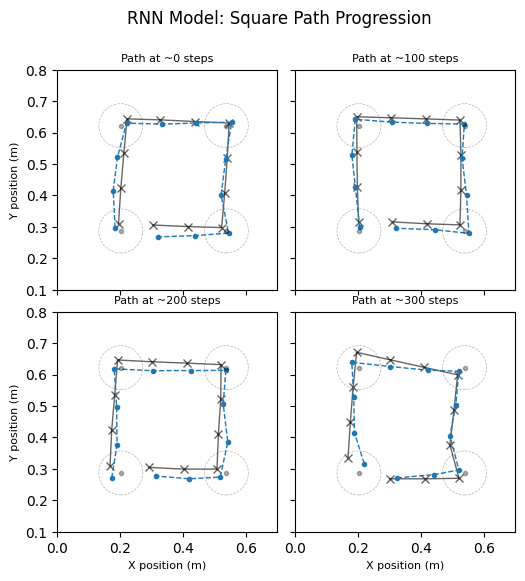

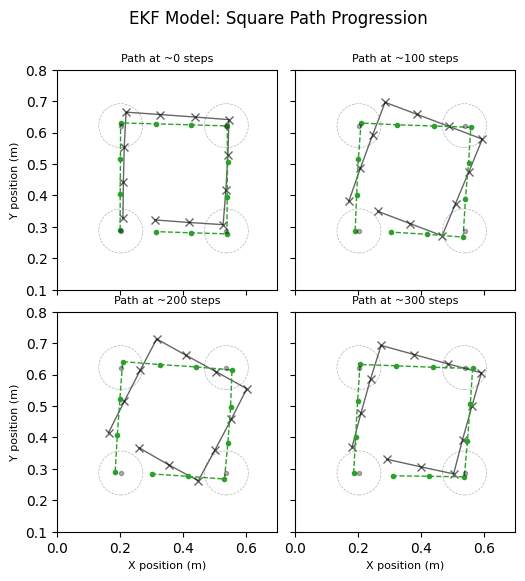

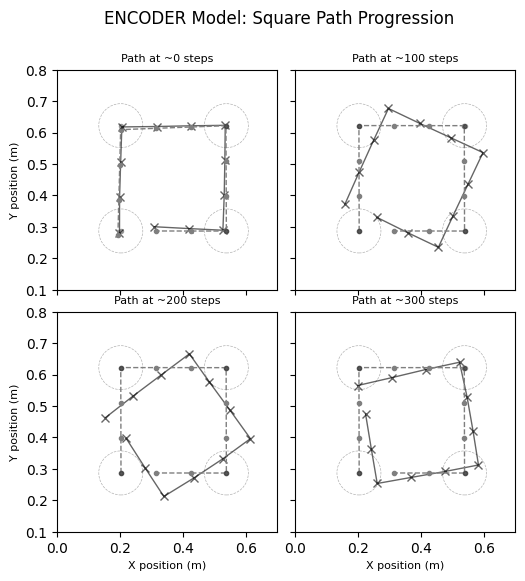

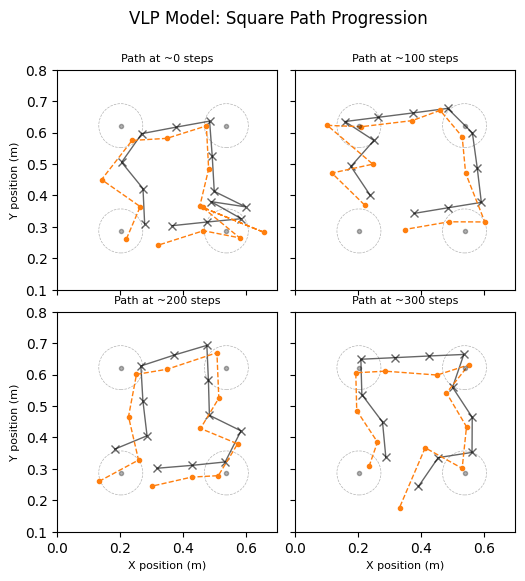

In [4]:
rnn_square_df = pd.read_csv('final_rnn_square_m3_2.csv', index_col = [0])
enc_square_df = pd.read_csv('final_encoder_square_m3.csv', index_col = [0])
ekf_square_df = pd.read_csv('final_ekf_square_m3.csv', index_col = [0])
vlp_square_df = pd.read_csv('final_vlp_square_m3_2.csv', index_col = [0])



plot_model_2x2(rnn_square_df, 'rnn', [(27, 39), (170, 182), (266, 278), (326, 338)], 'square_rnn_grid')
plot_model_2x2(ekf_square_df, 'ekf', [(27, 39), (171, 183), (267, 279), (327, 339)], 'square_ekf_grid')
plot_model_2x2(enc_square_df, 'encoder', [(3, 15), (99, 111), (195, 207), (291, 303)], 'square_enc_grid')
plot_model_2x2(vlp_square_df, 'vlp', [(6, 19), (113, 125), (197, 209), (308, 320)], 'square_vlp_grid')

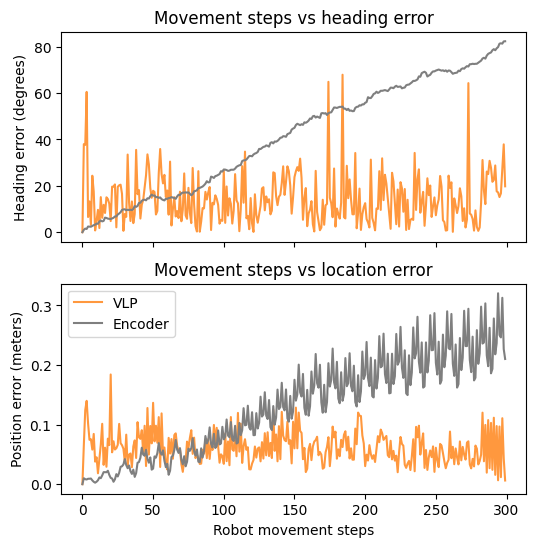

In [5]:
rnn_square_df = pd.read_csv('final_rnn_square_m3_2.csv', index_col = [0])
enc_square_df = pd.read_csv('final_encoder_square_m3.csv', index_col = [0])
ekf_square_df = pd.read_csv('final_ekf_square_m3.csv', index_col = [0])
vlp_square_df = pd.read_csv('final_vlp_square_m3_2.csv', index_col = [0])

rnn_ang_errs, rnn_loc_errs = calc_errors(rnn_square_df, 'rnn')
ekf_ang_errs, ekf_loc_errs = calc_errors(ekf_square_df, 'ekf')
enc_ang_errs, enc_loc_errs = calc_errors(enc_square_df, 'enc')
vlp_ang_errs, vlp_loc_errs = calc_errors(vlp_square_df, 'vlp')



fig, axes = plt.subplots(2, 1, figsize=(6, 6))
axes[0].plot(vlp_ang_errs[:300].abs() , c = color_scheme['vlp'], label = 'VLP', alpha = 0.8)
axes[0].plot(enc_ang_errs[:300].abs() , c = color_scheme['encoder'], label = 'Encoder')
axes[0].set_title('Movement steps vs heading error')
axes[0].set_ylabel('Heading error (degrees)')
axes[0].set_xticklabels([])

axes[1].plot(vlp_loc_errs[:300] , c = color_scheme['vlp'], label = 'VLP', alpha = 0.8)
axes[1].plot(enc_loc_errs[:300] , c = color_scheme['encoder'], label = 'Encoder')
axes[1].set_title('Movement steps vs location error')
axes[1].set_ylabel('Position error (meters)')
axes[1].set_xlabel('Robot movement steps')
axes[1].legend()

plt.savefig(FIGURES_DIR/f"live_navigation-square_vlp_enc_errs.png", dpi=300)



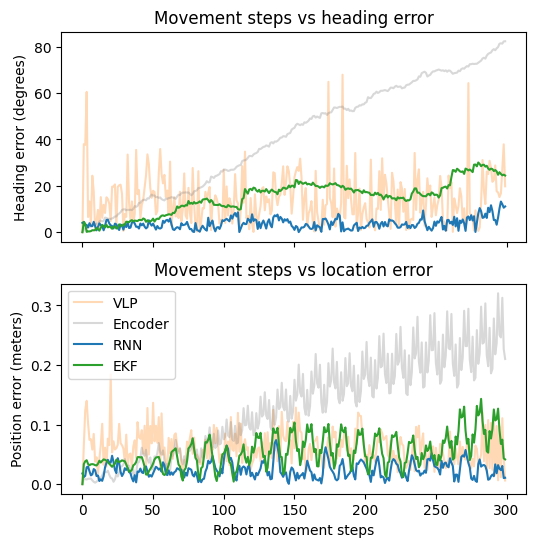

In [6]:
rnn_square_df = pd.read_csv('final_rnn_square_m3_2.csv', index_col = [0])
enc_square_df = pd.read_csv('final_encoder_square_m3.csv', index_col = [0])
ekf_square_df = pd.read_csv('final_ekf_square_m3.csv', index_col = [0])
vlp_square_df = pd.read_csv('final_vlp_square_m3_2.csv', index_col = [0])

rnn_ang_errs, rnn_loc_errs = calc_errors(rnn_square_df, 'rnn')
ekf_ang_errs, ekf_loc_errs = calc_errors(ekf_square_df, 'ekf')
enc_ang_errs, enc_loc_errs = calc_errors(enc_square_df, 'enc')
vlp_ang_errs, vlp_loc_errs = calc_errors(vlp_square_df, 'vlp')


fig, axes = plt.subplots(2, 1, figsize=(6, 6))
axes[0].plot(vlp_ang_errs[:300].abs() , c = color_scheme['vlp'], label = 'VLP', alpha = 0.3)
axes[0].plot(enc_ang_errs[:300].abs() , c = color_scheme['encoder'], label = 'Encoder', alpha = 0.3)
axes[0].plot(rnn_ang_errs[20:320].abs().values , c = color_scheme['rnn'], label = 'RNN', alpha = 1)
axes[0].plot(ekf_ang_errs[:300].abs().values , c = color_scheme['ekf'], label = 'EKF', alpha = 1)
axes[0].set_title('Movement steps vs heading error')
axes[0].set_ylabel('Heading error (degrees)')
axes[0].set_xticklabels([])

axes[1].plot(vlp_loc_errs[:300] , c = color_scheme['vlp'], label = 'VLP', alpha = 0.3)
axes[1].plot(enc_loc_errs[:300] , c = color_scheme['encoder'], label = 'Encoder', alpha = 0.3)
axes[1].plot(rnn_loc_errs[20:320] , c = color_scheme['rnn'], label = 'RNN', alpha = 1)
axes[1].plot(ekf_loc_errs[:300] , c = color_scheme['ekf'], label = 'EKF', alpha = 1)
axes[1].set_title('Movement steps vs location error')
axes[1].set_ylabel('Position error (meters)')
axes[1].set_xlabel('Robot movement steps')
axes[1].legend()

plt.savefig(FIGURES_DIR/f"live_navigation-all_square_errs.png", dpi=300)

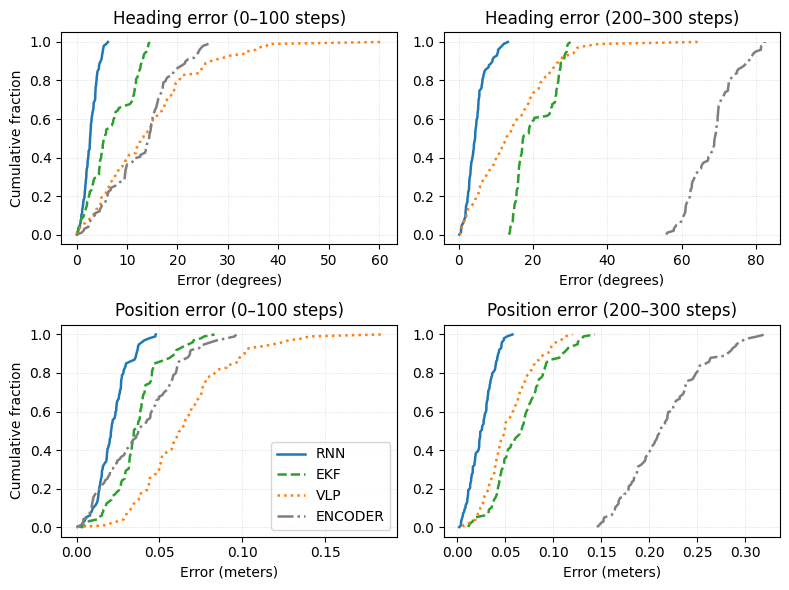

In [7]:
rnn_square_df = pd.read_csv('final_rnn_square_m3_2.csv', index_col = [0])
enc_square_df = pd.read_csv('final_encoder_square_m3.csv', index_col = [0])
ekf_square_df = pd.read_csv('final_ekf_square_m3.csv', index_col = [0])
vlp_square_df = pd.read_csv('final_vlp_square_m3_2.csv', index_col = [0])

rnn_ang_errs, rnn_loc_errs = calc_errors(rnn_square_df, 'rnn')
ekf_ang_errs, ekf_loc_errs = calc_errors(ekf_square_df, 'ekf')
enc_ang_errs, enc_loc_errs = calc_errors(enc_square_df, 'enc')
vlp_ang_errs, vlp_loc_errs = calc_errors(vlp_square_df, 'vlp')

def plot_cdf(ax, data, label, color, linestyle):
    sorted_data = np.sort(data)
    yvals = np.linspace(0, 1, len(sorted_data))
    ax.plot(sorted_data, yvals, label=label, color=color, linestyle = linestyle, linewidth = 1.8)

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
steps_early = slice(0, 100)
steps_late = slice(-100, None)

# CDFs: Heading Error (absolute, degrees)
for model, err_array in zip(
    ['rnn', 'ekf', 'vlp', 'encoder'],
    [rnn_ang_errs[20:320], ekf_ang_errs[:300], vlp_ang_errs[:300], enc_ang_errs[:300]]
):
    plot_cdf(axes[0,0], np.abs(err_array[steps_early]), model.upper(), color_scheme[model], linestyle=linestyles[model])
    plot_cdf(axes[0,1], np.abs(err_array[steps_late]), model.upper(), color_scheme[model], linestyle=linestyles[model])

axes[0,0].set_title("Heading error (0–100 steps)")
axes[0,1].set_title("Heading error (200–300 steps)")
axes[0,0].set_ylabel("Cumulative fraction")
axes[0,0].set_xlabel("Error (degrees)")
axes[0,1].set_xlabel("Error (degrees)")


# CDFs: Position Error
for model, err_array in zip(
    ['rnn', 'ekf', 'vlp', 'encoder'],
    [rnn_loc_errs[20:320], ekf_loc_errs[:300], vlp_loc_errs[:300], enc_loc_errs[:300]]
):
    plot_cdf(axes[1,0], err_array[steps_early], model.upper(), color_scheme[model], linestyle=linestyles[model])
    plot_cdf(axes[1,1], err_array[steps_late], model.upper(), color_scheme[model], linestyle=linestyles[model])

axes[1,0].set_title("Position error (0–100 steps)")
axes[1,1].set_title("Position error (200–300 steps)")
axes[1,0].set_ylabel("Cumulative fraction")
axes[1,0].set_xlabel("Error (meters)")
axes[1,1].set_xlabel("Error (meters)")
axes[1,0].legend()

for ax in axes.flat:
    ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.6)


plt.tight_layout()
plt.savefig(FIGURES_DIR / "live_navigation-square_cdf_comparison.png", dpi=300)
plt.show()


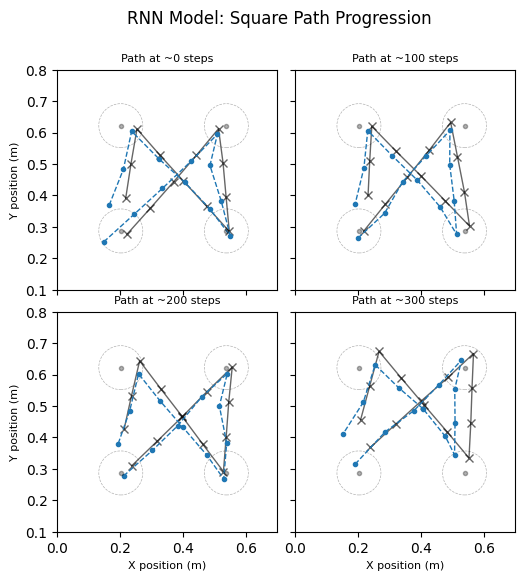

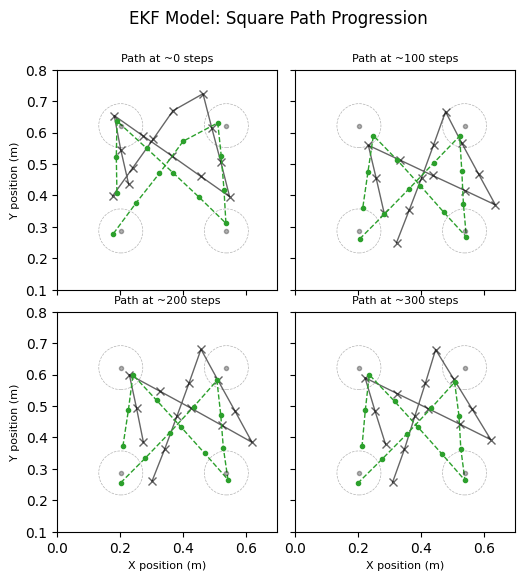

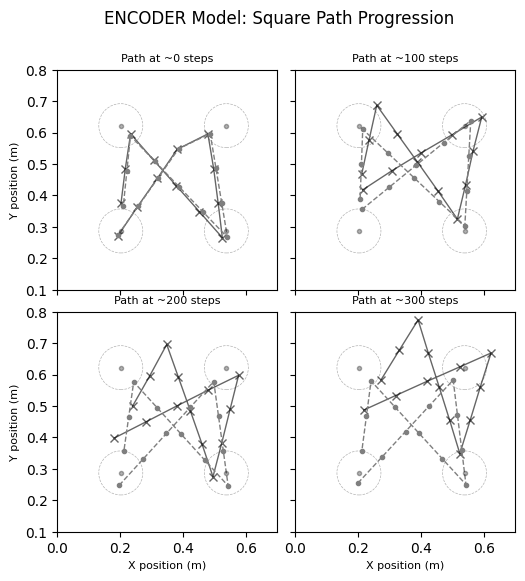

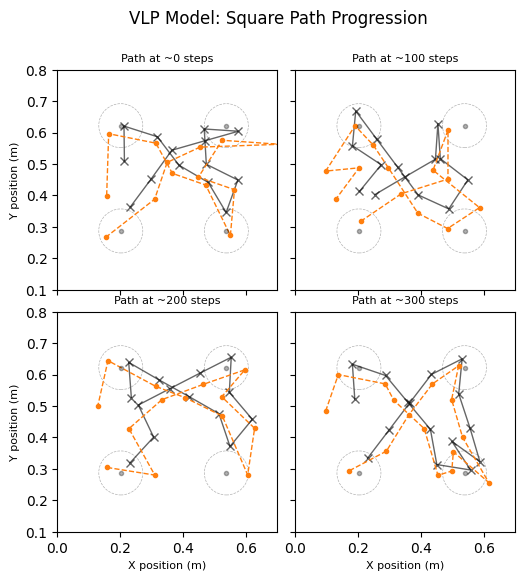

In [8]:
rnn_hourglass_df = pd.read_csv('final_rnn_hourglass_m3.csv', index_col = [0])
enc_hourglass_df = pd.read_csv('final_encoder_hourglass_m3.csv', index_col = [0])
ekf_hourglass_df = pd.read_csv('final_ekf_hourglass_m3.csv', index_col = [0])
vlp_hourglass_df = pd.read_csv('final_vlp_hourglass_m3.csv', index_col = [0])



plot_model_2x2(rnn_hourglass_df, 'rnn', [(32, 46), (130, 144), (228, 242), (327, 341)], 'hourglass_rnn_grid')
plot_model_2x2(ekf_hourglass_df, 'ekf', [(4, 18), (102, 116), (201, 215), (299, 313)], 'hourglass_ekf_grid')
plot_model_2x2(enc_hourglass_df, 'encoder', [(3, 17), (99, 113), (196, 210), (292, 306)], 'hourglass_enc_grid')
plot_model_2x2(vlp_hourglass_df, 'vlp', [(27, 41), (134, 148), (208, 222), (313, 329)], 'hourglass_vlp_grid')

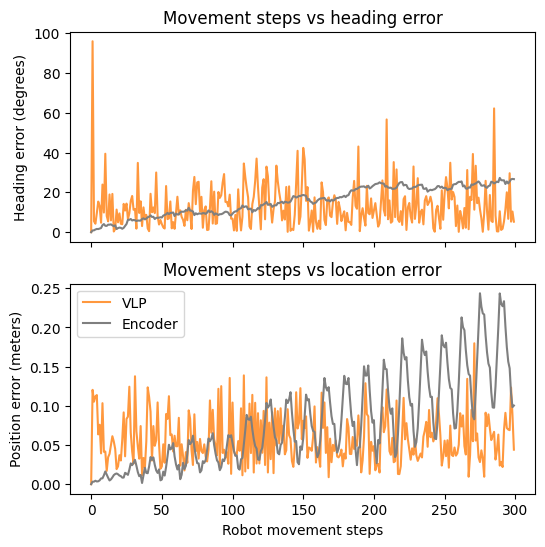

In [ ]:
rnn_hourglass_df = pd.read_csv('final_rnn_hourglass_m3.csv', index_col = [0])
enc_hourglass_df = pd.read_csv('final_encoder_hourglass_m3.csv', index_col = [0])
ekf_hourglass_df = pd.read_csv('final_ekf_hourglass_m3.csv', index_col = [0])
vlp_hourglass_df = pd.read_csv('final_vlp_hourglass_m3.csv', index_col = [0])

rnn_ang_errs, rnn_loc_errs = calc_errors(rnn_hourglass_df, 'rnn')
ekf_ang_errs, ekf_loc_errs = calc_errors(ekf_hourglass_df, 'ekf')
enc_ang_errs, enc_loc_errs = calc_errors(enc_hourglass_df, 'enc')
vlp_ang_errs, vlp_loc_errs = calc_errors(vlp_hourglass_df, 'vlp')



fig, axes = plt.subplots(2, 1, figsize=(6, 6))
axes[0].plot(vlp_ang_errs[:300].abs() , c = color_scheme['vlp'], label = 'VLP', alpha = 0.8)
axes[0].plot(enc_ang_errs[:300].abs() , c = color_scheme['encoder'], label = 'Encoder')
axes[0].set_title('Movement steps vs heading error')
axes[0].set_ylabel('Heading error (degrees)')
axes[0].set_xticklabels([])

axes[1].plot(vlp_loc_errs[:300] , c = color_scheme['vlp'], label = 'VLP', alpha = 0.8)
axes[1].plot(enc_loc_errs[:300] , c = color_scheme['encoder'], label = 'Encoder')
axes[1].set_title('Movement steps vs location error')
axes[1].set_ylabel('Position error (meters)')
axes[1].set_xlabel('Robot movement steps')
axes[1].legend()

plt.savefig(FIGURES_DIR/f"live_navigation-hourglass_vlp_enc_errs.png", dpi=300)


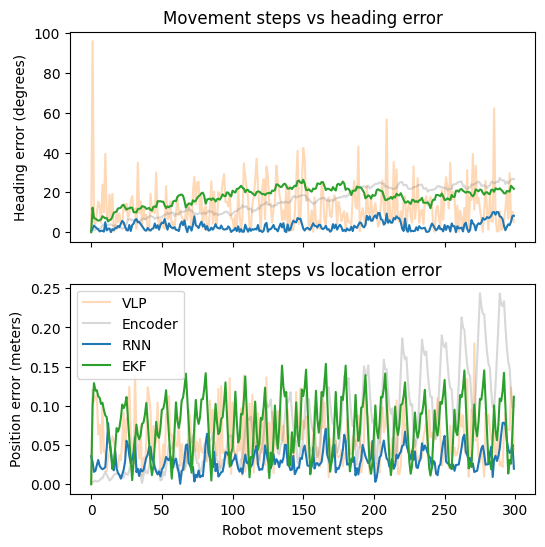

In [ ]:
rnn_hourglass_df = pd.read_csv('final_rnn_hourglass_m3.csv', index_col = [0])
enc_hourglass_df = pd.read_csv('final_encoder_hourglass_m3.csv', index_col = [0])
ekf_hourglass_df = pd.read_csv('final_ekf_hourglass_m3.csv', index_col = [0])
vlp_hourglass_df = pd.read_csv('final_vlp_hourglass_m3.csv', index_col = [0])

rnn_ang_errs, rnn_loc_errs = calc_errors(rnn_hourglass_df, 'rnn')
ekf_ang_errs, ekf_loc_errs = calc_errors(ekf_hourglass_df, 'ekf')
enc_ang_errs, enc_loc_errs = calc_errors(enc_hourglass_df, 'enc')
vlp_ang_errs, vlp_loc_errs = calc_errors(vlp_hourglass_df, 'vlp')




fig, axes = plt.subplots(2, 1, figsize=(6, 6))
axes[0].plot(vlp_ang_errs[:300].abs() , c = color_scheme['vlp'], label = 'VLP', alpha = 0.3)
axes[0].plot(enc_ang_errs[:300].abs() , c = color_scheme['encoder'], label = 'Encoder', alpha = 0.3)
axes[0].plot(rnn_ang_errs[20:320].abs().values , c = color_scheme['rnn'], label = 'RNN', alpha = 1)
axes[0].plot(ekf_ang_errs[:300].abs().values , c = color_scheme['ekf'], label = 'EKF', alpha = 1)
axes[0].set_title('Movement steps vs heading error')
axes[0].set_ylabel('Heading error (degrees)')
axes[0].set_xticklabels([])

axes[1].plot(vlp_loc_errs[:300] , c = color_scheme['vlp'], label = 'VLP', alpha = 0.3)
axes[1].plot(enc_loc_errs[:300] , c = color_scheme['encoder'], label = 'Encoder', alpha = 0.3)
axes[1].plot(rnn_loc_errs[20:320] , c = color_scheme['rnn'], label = 'RNN', alpha = 1)
axes[1].plot(ekf_loc_errs[:300] , c = color_scheme['ekf'], label = 'EKF', alpha = 1)
axes[1].set_title('Movement steps vs location error')
axes[1].set_ylabel('Position error (meters)')
axes[1].set_xlabel('Robot movement steps')
axes[1].legend()

plt.savefig(FIGURES_DIR/f"live_navigation-all_hourglass_errs.png", dpi=300)

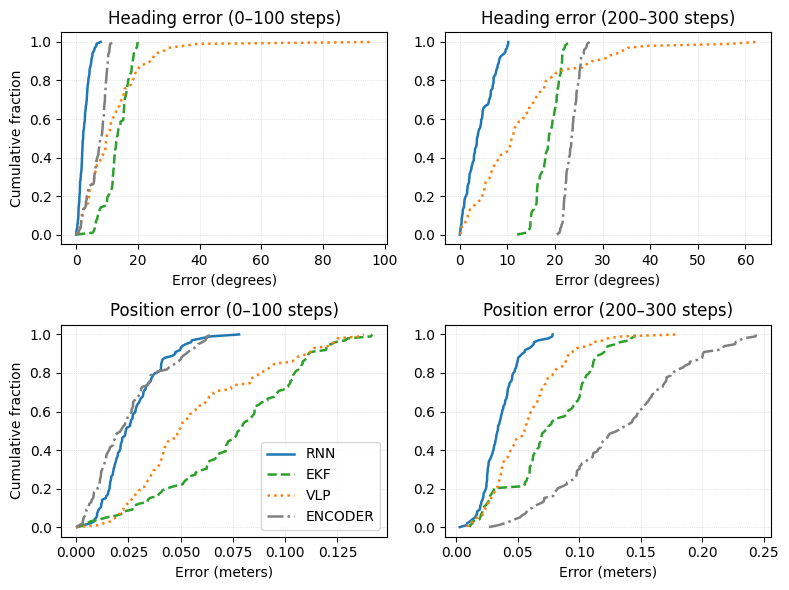

In [ ]:
rnn_hourglass_df = pd.read_csv('final_rnn_hourglass_m3.csv', index_col = [0])
enc_hourglass_df = pd.read_csv('final_encoder_hourglass_m3.csv', index_col = [0])
ekf_hourglass_df = pd.read_csv('final_ekf_hourglass_m3.csv', index_col = [0])
vlp_hourglass_df = pd.read_csv('final_vlp_hourglass_m3.csv', index_col = [0])

rnn_ang_errs, rnn_loc_errs = calc_errors(rnn_hourglass_df, 'rnn')
ekf_ang_errs, ekf_loc_errs = calc_errors(ekf_hourglass_df, 'ekf')
enc_ang_errs, enc_loc_errs = calc_errors(enc_hourglass_df, 'enc')
vlp_ang_errs, vlp_loc_errs = calc_errors(vlp_hourglass_df, 'vlp')

def plot_cdf(ax, data, label, color, linestyle):
    sorted_data = np.sort(data)
    yvals = np.linspace(0, 1, len(sorted_data))
    ax.plot(sorted_data, yvals, label=label, color=color, linestyle = linestyle, linewidth = 1.8)

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
steps_early = slice(0, 100)
steps_late = slice(-100, None)

# CDFs: Heading Error (absolute, degrees)
for model, err_array in zip(
    ['rnn', 'ekf', 'vlp', 'encoder'],
    [rnn_ang_errs[20:320], ekf_ang_errs[:300], vlp_ang_errs[:300], enc_ang_errs[:300]]
):
    plot_cdf(axes[0,0], np.abs(err_array[steps_early]), model.upper(), color_scheme[model], linestyle=linestyles[model])
    plot_cdf(axes[0,1], np.abs(err_array[steps_late]), model.upper(), color_scheme[model], linestyle=linestyles[model])

axes[0,0].set_title("Heading error (0–100 steps)")
axes[0,1].set_title("Heading error (200–300 steps)")
axes[0,0].set_ylabel("Cumulative fraction")
axes[0,0].set_xlabel("Error (degrees)")
axes[0,1].set_xlabel("Error (degrees)")


# CDFs: Position Error
for model, err_array in zip(
    ['rnn', 'ekf', 'vlp', 'encoder'],
    [rnn_loc_errs[20:320], ekf_loc_errs[:300], vlp_loc_errs[:300], enc_loc_errs[:300]]
):
    plot_cdf(axes[1,0], err_array[steps_early], model.upper(), color_scheme[model], linestyle=linestyles[model])
    plot_cdf(axes[1,1], err_array[steps_late], model.upper(), color_scheme[model], linestyle=linestyles[model])

axes[1,0].set_title("Position error (0–100 steps)")
axes[1,1].set_title("Position error (200–300 steps)")
axes[1,0].set_ylabel("Cumulative fraction")
axes[1,0].set_xlabel("Error (meters)")
axes[1,1].set_xlabel("Error (meters)")
axes[1,0].legend()

for ax in axes.flat:
    ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.6)


plt.tight_layout()
plt.savefig(FIGURES_DIR / "live_navigation-hourglass_cdf_comparison.png", dpi=300)
plt.show()


# Random path

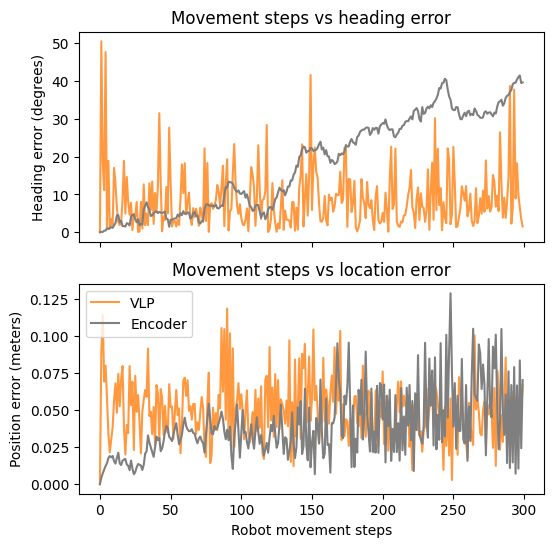

In [ ]:
rnn_random_df = pd.read_csv('final_rnn_random_m3_2.csv', index_col = [0])
enc_random_df = pd.read_csv('final_encoder_random_m3.csv', index_col = [0])
ekf_random_df = pd.read_csv('final_ekf_random_m3.csv', index_col = [0])
vlp_random_df = pd.read_csv('final_vlp_random_m3.csv', index_col = [0])

rnn_ang_errs, rnn_loc_errs = calc_errors(rnn_random_df, 'rnn')
ekf_ang_errs, ekf_loc_errs = calc_errors(ekf_random_df, 'ekf')
enc_ang_errs, enc_loc_errs = calc_errors(enc_random_df, 'enc')
vlp_ang_errs, vlp_loc_errs = calc_errors(vlp_random_df, 'vlp')


fig, axes = plt.subplots(2, 1, figsize=(6, 6))
axes[0].plot(vlp_ang_errs[:300].abs() , c = color_scheme['vlp'], label = 'VLP', alpha = 0.8)
axes[0].plot(enc_ang_errs[:300].abs() , c = color_scheme['encoder'], label = 'Encoder')
axes[0].set_title('Movement steps vs heading error')
axes[0].set_ylabel('Heading error (degrees)')
axes[0].set_xticklabels([])

axes[1].plot(vlp_loc_errs[:300] , c = color_scheme['vlp'], label = 'VLP', alpha = 0.8)
axes[1].plot(enc_loc_errs[:300] , c = color_scheme['encoder'], label = 'Encoder')
axes[1].set_title('Movement steps vs location error')
axes[1].set_ylabel('Position error (meters)')
axes[1].set_xlabel('Robot movement steps')
axes[1].legend()


plt.savefig(FIGURES_DIR/f"live_navigation-random_vlp_enc_errs.png", dpi=300)

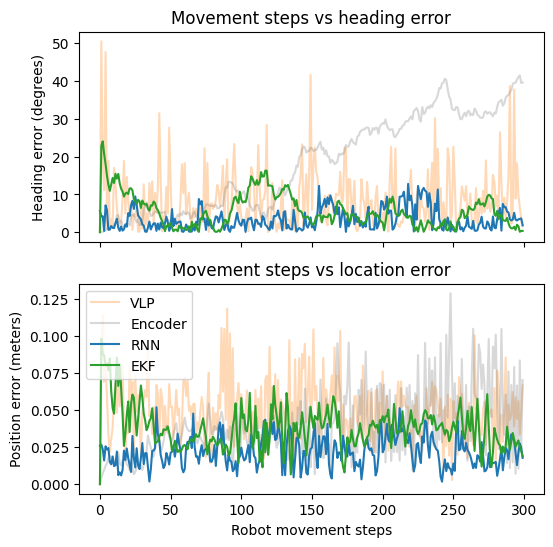

In [29]:
rnn_random_df = pd.read_csv('final_rnn_random_m3_2.csv', index_col = [0])
enc_random_df = pd.read_csv('final_encoder_random_m3.csv', index_col = [0])
ekf_random_df = pd.read_csv('final_ekf_random_m3.csv', index_col = [0])
vlp_random_df = pd.read_csv('final_vlp_random_m3.csv', index_col = [0])

rnn_ang_errs, rnn_loc_errs = calc_errors(rnn_random_df, 'rnn')
ekf_ang_errs, ekf_loc_errs = calc_errors(ekf_random_df, 'ekf')
enc_ang_errs, enc_loc_errs = calc_errors(enc_random_df, 'enc')
vlp_ang_errs, vlp_loc_errs = calc_errors(vlp_random_df, 'vlp')


fig, axes = plt.subplots(2, 1, figsize=(6, 6))
axes[0].plot(vlp_ang_errs[:300].abs() , c = color_scheme['vlp'], label = 'VLP', alpha = 0.3)
axes[0].plot(enc_ang_errs[:300].abs() , c = color_scheme['encoder'], label = 'Encoder', alpha = 0.3)
axes[0].plot(rnn_ang_errs[20:320].abs().values , c = color_scheme['rnn'], label = 'RNN', alpha = 1)
axes[0].plot(ekf_ang_errs[:300].abs().values , c = color_scheme['ekf'], label = 'EKF', alpha = 1)
axes[0].set_title('Movement steps vs heading error')
axes[0].set_ylabel('Heading error (degrees)')
axes[0].set_xticklabels([])

axes[1].plot(vlp_loc_errs[:300] , c = color_scheme['vlp'], label = 'VLP', alpha = 0.3)
axes[1].plot(enc_loc_errs[:300] , c = color_scheme['encoder'], label = 'Encoder', alpha = 0.3)
axes[1].plot(rnn_loc_errs[20:320] , c = color_scheme['rnn'], label = 'RNN', alpha = 1)
axes[1].plot(ekf_loc_errs[:300] , c = color_scheme['ekf'], label = 'EKF', alpha = 1)
axes[1].set_title('Movement steps vs location error')
axes[1].set_ylabel('Position error (meters)')
axes[1].set_xlabel('Robot movement steps')
axes[1].legend()

plt.savefig(FIGURES_DIR/f"live_navigation-all_random_errs.png", dpi=300)

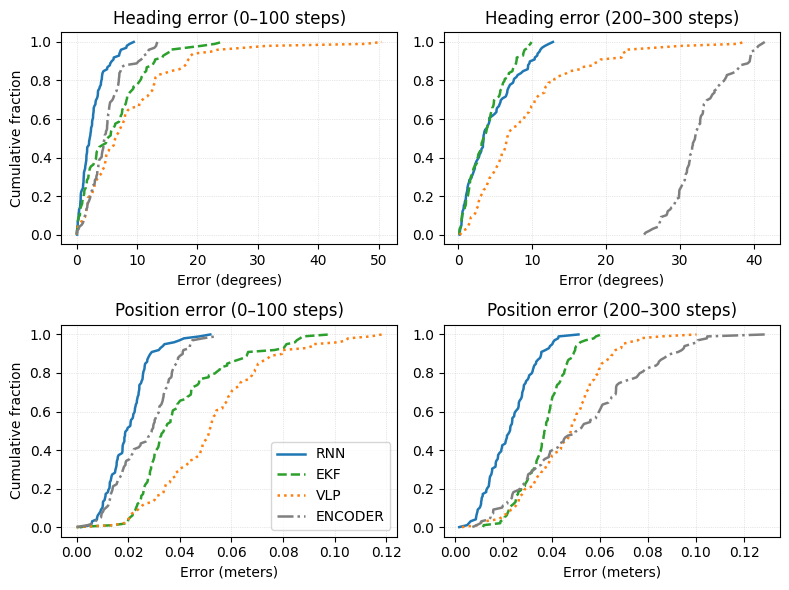

In [30]:
rnn_random_df = pd.read_csv('final_rnn_random_m3_2.csv', index_col = [0])
enc_random_df = pd.read_csv('final_encoder_random_m3.csv', index_col = [0])
ekf_random_df = pd.read_csv('final_ekf_random_m3.csv', index_col = [0])
vlp_random_df = pd.read_csv('final_vlp_random_m3.csv', index_col = [0])

rnn_ang_errs, rnn_loc_errs = calc_errors(rnn_random_df, 'rnn')
ekf_ang_errs, ekf_loc_errs = calc_errors(ekf_random_df, 'ekf')
enc_ang_errs, enc_loc_errs = calc_errors(enc_random_df, 'enc')
vlp_ang_errs, vlp_loc_errs = calc_errors(vlp_random_df, 'vlp')

def plot_cdf(ax, data, label, color, linestyle):
    sorted_data = np.sort(data)
    yvals = np.linspace(0, 1, len(sorted_data))
    ax.plot(sorted_data, yvals, label=label, color=color, linestyle = linestyle, linewidth = 1.8)

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
steps_early = slice(0, 100)
steps_late = slice(-100, None)

# CDFs: Heading Error (absolute, degrees)
for model, err_array in zip(
    ['rnn', 'ekf', 'vlp', 'encoder'],
    [rnn_ang_errs[20:320], ekf_ang_errs[:300], vlp_ang_errs[:300], enc_ang_errs[:300]]
):
    plot_cdf(axes[0,0], np.abs(err_array[steps_early]), model.upper(), color_scheme[model], linestyle=linestyles[model])
    plot_cdf(axes[0,1], np.abs(err_array[steps_late]), model.upper(), color_scheme[model], linestyle=linestyles[model])

axes[0,0].set_title("Heading error (0–100 steps)")
axes[0,1].set_title("Heading error (200–300 steps)")
axes[0,0].set_ylabel("Cumulative fraction")
axes[0,0].set_xlabel("Error (degrees)")
axes[0,1].set_xlabel("Error (degrees)")


# CDFs: Position Error
for model, err_array in zip(
    ['rnn', 'ekf', 'vlp', 'encoder'],
    [rnn_loc_errs[20:320], ekf_loc_errs[:300], vlp_loc_errs[:300], enc_loc_errs[:300]]
):
    plot_cdf(axes[1,0], err_array[steps_early], model.upper(), color_scheme[model], linestyle=linestyles[model])
    plot_cdf(axes[1,1], err_array[steps_late], model.upper(), color_scheme[model], linestyle=linestyles[model])

axes[1,0].set_title("Position error (0–100 steps)")
axes[1,1].set_title("Position error (200–300 steps)")
axes[1,0].set_ylabel("Cumulative fraction")
axes[1,0].set_xlabel("Error (meters)")
axes[1,1].set_xlabel("Error (meters)")
axes[1,0].legend()

for ax in axes.flat:
    ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.6)


plt.tight_layout()
plt.savefig(FIGURES_DIR / "live_navigation-random_cdf_comparison.png", dpi=300)
plt.show()

# Captured robot


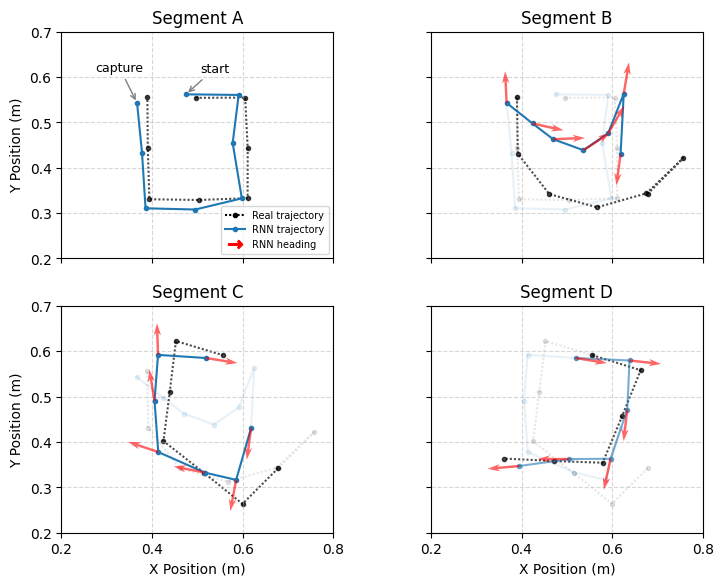

In [31]:
rnn_df = pd.read_csv('rnn_catputre_rotate.csv', index_col = [0]).loc[40:90].reset_index(drop = True)
vlp_df = pd.read_csv('vlp_catputre_rotate.csv', index_col = [0]).loc[24:74].reset_index(drop = True)
ekf_df = pd.read_csv('ekf_catputre_rotate.csv', index_col = [0]).loc[24:74].reset_index(drop = True)


xlim = (0.2, 0.8)
ylim = (0.2, 0.7)
arrow_length = 0.07

fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=True)

# Extract segments
rnn_seg_1 = rnn_df.iloc[15:23]
rnn_seg_2 = rnn_df.iloc[22:29]
rnn_seg_3 = rnn_df.iloc[28:35]
rnn_seg_4 = rnn_df.iloc[34:40]

def plot_with_arrows(ax, seg, rnn_alpha=1.0, real_alpha=1.0, color='r', label=None, plot_arrows=False):
    ax.plot(seg['real_x'], seg['real_y'], marker='.', c='k', alpha=real_alpha,
            linestyle=linestyles['real'], zorder=1)

    ax.plot(seg['rnn_x'], seg['rnn_y'], marker='.', c=color_scheme['rnn'], alpha=rnn_alpha,
            linestyle=linestyles['rnn'], zorder=2)

    if plot_arrows:
        theta = np.deg2rad(seg['rnn_heading'])
        dx = arrow_length * np.sin(theta)
        dy = arrow_length * np.cos(theta)
        ax.quiver(
            seg['rnn_x'], seg['rnn_y'], dx, dy,
            angles='xy', scale_units='xy', scale=1,
            color=color, width=0.009, headwidth=3, headlength=5, headaxislength=4,
            zorder=5, alpha=0.6
        )

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_aspect('equal')
    ax.grid(True, linestyle='--', alpha=0.5)

# Plot segments
plot_with_arrows(axes[0, 0], rnn_seg_1, real_alpha=0.7)
axes[0, 0].set_title("Segment A")
# Annotate start and capture
start_x, start_y = rnn_seg_1['rnn_x'].iloc[0], rnn_seg_1['rnn_y'].iloc[0]
end_x, end_y = rnn_seg_1['rnn_x'].iloc[-1], rnn_seg_1['rnn_y'].iloc[-1]


axes[0, 0].annotate(
    'start',
    xy=(start_x, start_y),
    xytext=(10, 16),
    textcoords='offset points',
    ha='left',
    fontsize=9,
    arrowprops=dict(arrowstyle='->', color='gray', lw=1)
)

axes[0, 0].annotate(
    'capture',
    xy=(end_x, end_y),
    xytext=(-30, 23),
    textcoords='offset points',
    ha='left',
    fontsize=9,
    arrowprops=dict(arrowstyle='->', color='gray', lw=1)
)



plot_with_arrows(axes[0, 1], rnn_seg_1, rnn_alpha=0.1, real_alpha=0.1, color='r')
plot_with_arrows(axes[0, 1], rnn_seg_2, plot_arrows=True, real_alpha=0.7)
axes[0, 1].set_title("Segment B")

plot_with_arrows(axes[1, 0], rnn_seg_2, rnn_alpha=0.1, real_alpha=0.1, color='r')
plot_with_arrows(axes[1, 0], rnn_seg_3, plot_arrows=True, real_alpha=0.7)
axes[1, 0].set_title("Segment C")

plot_with_arrows(axes[1, 1], rnn_seg_3, rnn_alpha=0.1, real_alpha=0.1, color='r')
plot_with_arrows(axes[1, 1], rnn_seg_4, plot_arrows=True, real_alpha=0.7, rnn_alpha=0.6)
axes[1, 1].set_title("Segment D")

# Tick labels and axis labels
for i in range(2):
    for j in range(2):
        if j != 0:
            axes[i, j].tick_params(labelleft=False)
        else:
            axes[i, j].set_ylabel("Y Position (m)")

        if i != 1:
            axes[i, j].tick_params(labelbottom=False)
        else:
            axes[i, j].set_xlabel("X Position (m)")

plt.tight_layout(pad=1.2)


from matplotlib.lines import Line2D
from matplotlib.patches import FancyArrow

# Custom legend elements
legend_elements = [
    Line2D([0], [0], color='k', linestyle=linestyles['real'], marker='.', label='Real trajectory'),
    Line2D([0], [0], color=color_scheme['rnn'], linestyle=linestyles['rnn'], marker='.', label='RNN trajectory'),
    Line2D([0], [0], color='r', marker=r'$\rightarrow$', linestyle='None', label='RNN heading', markersize=10)
]

axes[0, 0].legend(handles=legend_elements, loc='lower right', fontsize=7, frameon=True)

plt.savefig(FIGURES_DIR / "live_navigation-capture_rotate_rnn.png", dpi=300)
plt.show()


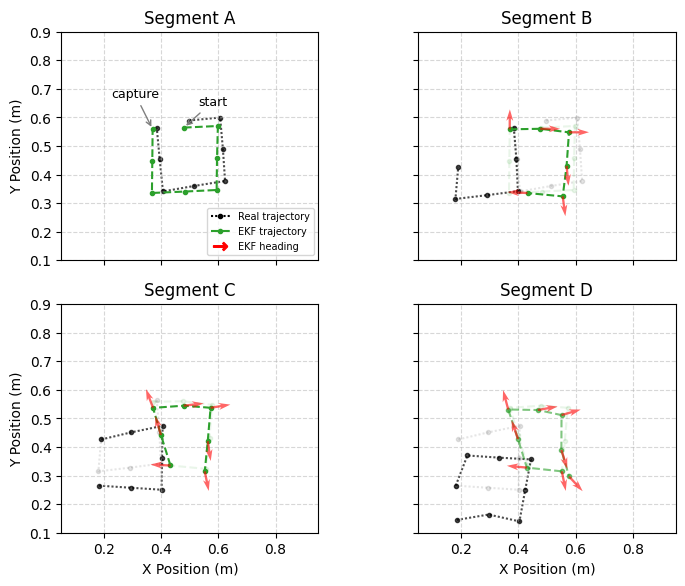

In [14]:

rnn_df = pd.read_csv('rnn_catputre_rotate.csv', index_col = [0]).loc[40:90].reset_index(drop = True)
vlp_df = pd.read_csv('vlp_catputre_rotate.csv', index_col = [0]).loc[24:74].reset_index(drop = True)
ekf_df = pd.read_csv('ekf_catputre_rotate.csv', index_col = [0]).loc[24:74].reset_index(drop = True)

xlim = (0.05, 0.95)
ylim = (0.1, 0.9)
arrow_length = 0.07

fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=True)

# Extract segments
ekf_seg_1 = ekf_df.iloc[16:24]
ekf_seg_2 = ekf_df.iloc[23:29]
ekf_seg_3 = ekf_df.iloc[28:35]
ekf_seg_4 = ekf_df.iloc[34:42]

def plot_with_arrows(ax, seg, ekf_alpha=1.0, real_alpha=1.0, color='r', label=None, plot_arrows=False):
    ax.plot(seg['real_x'], seg['real_y'], marker='.', c='k', alpha=real_alpha,
            linestyle=linestyles['real'], zorder=1)

    ax.plot(seg['ekf_x'], seg['ekf_y'], marker='.', c=color_scheme['ekf'], alpha=ekf_alpha,
            linestyle=linestyles['ekf'], zorder=2)

    if plot_arrows:
        theta = np.deg2rad(seg['ekf_heading'])
        dx = arrow_length * np.sin(theta)
        dy = arrow_length * np.cos(theta)
        ax.quiver(
            seg['ekf_x'], seg['ekf_y'], dx, dy,
            angles='xy', scale_units='xy', scale=1,
            color=color, width=0.009, headwidth=3, headlength=5, headaxislength=4,
            zorder=5, alpha=0.6
        )

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_aspect('equal')
    ax.grid(True, linestyle='--', alpha=0.5)

# Plot segments
plot_with_arrows(axes[0, 0], ekf_seg_1, real_alpha=0.7)
axes[0, 0].set_title("Segment A")

# Annotate start and capture
start_x, start_y = ekf_seg_1['ekf_x'].iloc[0], ekf_seg_1['ekf_y'].iloc[0]
end_x, end_y = ekf_seg_1['ekf_x'].iloc[-1], ekf_seg_1['ekf_y'].iloc[-1]

axes[0, 0].annotate(
    'start',
    xy=(start_x, start_y),
    xytext=(10, 16),
    textcoords='offset points',
    ha='left',
    fontsize=9,
    arrowprops=dict(arrowstyle='->', color='gray', lw=1)
)

axes[0, 0].annotate(
    'capture',
    xy=(end_x, end_y),
    xytext=(-30, 23),
    textcoords='offset points',
    ha='left',
    fontsize=9,
    arrowprops=dict(arrowstyle='->', color='gray', lw=1)
)

# Other subplots
plot_with_arrows(axes[0, 1], ekf_seg_1, ekf_alpha=0.1, real_alpha=0.1, color='r')
plot_with_arrows(axes[0, 1], ekf_seg_2, plot_arrows=True, real_alpha=0.7)
axes[0, 1].set_title("Segment B")

plot_with_arrows(axes[1, 0], ekf_seg_2, ekf_alpha=0.1, real_alpha=0.1, color='r')
plot_with_arrows(axes[1, 0], ekf_seg_3, plot_arrows=True, real_alpha=0.7)
axes[1, 0].set_title("Segment C")

plot_with_arrows(axes[1, 1], ekf_seg_3, ekf_alpha=0.1, real_alpha=0.1, color='r')
plot_with_arrows(axes[1, 1], ekf_seg_4, plot_arrows=True, real_alpha=0.7, ekf_alpha=0.6)
axes[1, 1].set_title("Segment D")

# Tick labels and axis labels
for i in range(2):
    for j in range(2):
        if j != 0:
            axes[i, j].tick_params(labelleft=False)
        else:
            axes[i, j].set_ylabel("Y Position (m)")

        if i != 1:
            axes[i, j].tick_params(labelbottom=False)
        else:
            axes[i, j].set_xlabel("X Position (m)")

plt.tight_layout(pad=1.2)

# Custom legend for Segment A
legend_elements = [
    Line2D([0], [0], color='k', linestyle=linestyles['real'], marker='.', label='Real trajectory'),
    Line2D([0], [0], color=color_scheme['ekf'], linestyle=linestyles['ekf'], marker='.', label='EKF trajectory'),
    Line2D([0], [0], color='r', marker=r'$\rightarrow$', linestyle='None', label='EKF heading', markersize=10)
]

axes[0, 0].legend(handles=legend_elements, loc='lower right', fontsize=7, frameon=True)

plt.savefig(FIGURES_DIR / "live_navigation-capture_rotate_ekf.png", dpi=300)
plt.show()


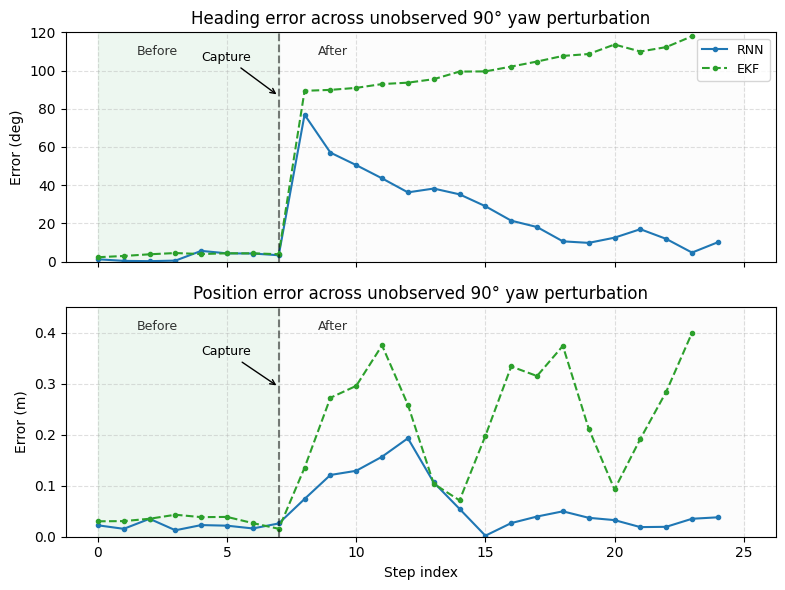

In [15]:

rnn_df = pd.read_csv('rnn_catputre_rotate.csv', index_col = [0]).loc[40:90].reset_index(drop = True)
vlp_df = pd.read_csv('vlp_catputre_rotate.csv', index_col = [0]).loc[24:74].reset_index(drop = True)
ekf_df = pd.read_csv('ekf_catputre_rotate.csv', index_col = [0]).loc[24:74].reset_index(drop = True)



fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Compute errors
rnn_ang_errs, rnn_loc_errs = calc_errors(rnn_df, 'rnn')
ekf_ang_errs, ekf_loc_errs = calc_errors(ekf_df, 'ekf')

# Trimmed index range for plotting
idx_range = np.arange(15, 40)
capture_idx = 7  # relative to slice

# --- Top plot: Heading Error ---
axes[0].plot(abs(rnn_ang_errs[15:40].values), marker='.', linestyle=linestyles['rnn'],
             color=color_scheme['rnn'], label='RNN')
axes[0].plot(abs(ekf_ang_errs[16:40].values), marker='.', linestyle=linestyles['ekf'],
             color=color_scheme['ekf'], label='EKF')

axes[0].axvline(capture_idx, color='k', linestyle='--', alpha=0.5)
axes[0].annotate('Capture', xy=(capture_idx, axes[0].get_ylim()[1] * 0.7),
                 xytext=(capture_idx - 3, axes[0].get_ylim()[1] * 0.85),
                 textcoords='data',
                 arrowprops=dict(arrowstyle='->', lw=1, color='k'),
                 fontsize=9)

axes[0].set_ylabel("Error (deg)")
axes[0].set_title("Heading error across unobserved 90° yaw perturbation")
axes[0].legend(loc='upper right', fontsize=9)
axes[0].grid(True, linestyle='--', alpha=0.4)
axes[0].set_ylim(0, 120)

# --- Bottom plot: Location Error ---
axes[1].plot(abs(rnn_loc_errs[15:40]), marker='.', linestyle=linestyles['rnn'],
             color=color_scheme['rnn'])
axes[1].plot(abs(ekf_loc_errs[16:40]), marker='.', linestyle=linestyles['ekf'],
             color=color_scheme['ekf'])

axes[1].axvline(capture_idx, color='k', linestyle='--', alpha=0.5)
axes[1].annotate('Capture', xy=(capture_idx, axes[1].get_ylim()[1] * 0.7),
                 xytext=(capture_idx - 3, axes[1].get_ylim()[1] * 0.85),
                 textcoords='data',
                 arrowprops=dict(arrowstyle='->', lw=1, color='k'),
                 fontsize=9)

axes[1].set_ylabel("Error (m)")
axes[1].set_xlabel("Step index")
axes[1].set_title("Position error across unobserved 90° yaw perturbation")
axes[1].grid(True, linestyle='--', alpha=0.4)
axes[1].set_ylim(0, 0.45)

# Adjust layout
plt.tight_layout()



# Shade pre- and post-rotation regions (light gray)
pre_color = '#d4edda'   # pastel green (Before)
post_color = '#cfd2d4'  # cool gray (After)
for ax in axes:
    ax.axvspan(0, capture_idx, color=pre_color, alpha=0.4, zorder=0, label='_nolegend_')
    ax.axvspan(capture_idx, len(idx_range), color=post_color, alpha=0.05, zorder=0, label='_nolegend_')

# Annotate regions with faint text
for ax in axes:
    y_top = ax.get_ylim()[1]
    ax.text(1.5, y_top * 0.90, 'Before', fontsize=9, color='k', alpha = 0.8)
    ax.text(capture_idx + 1.5, y_top * 0.90, 'After', fontsize=9, color='k', alpha = 0.8)


plt.savefig(FIGURES_DIR / "live_navigation-capture_rotate_errors.png", dpi=300)
plt.show()


# Translate only

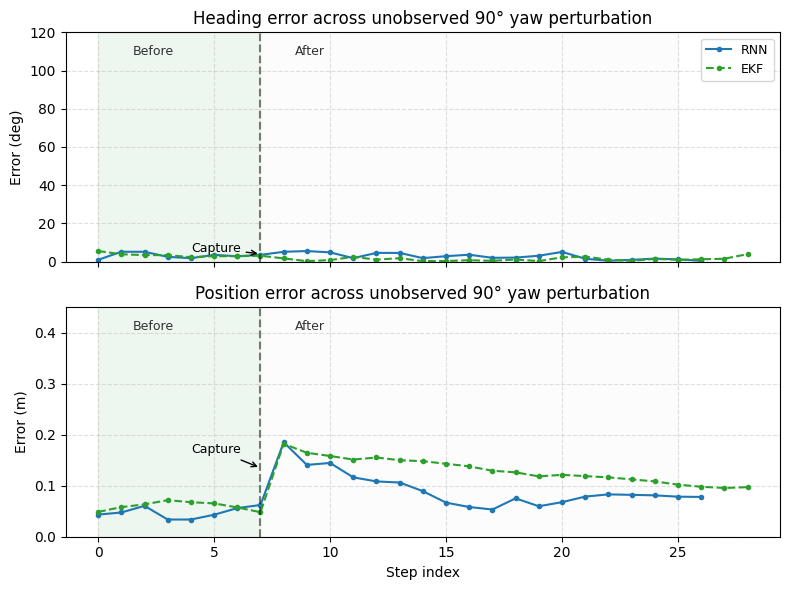

In [16]:
rnn_df = pd.read_csv('rnn_capture_trans.csv', index_col = [0]).loc[25:65].reset_index(drop = True)
ekf_df = pd.read_csv('ekf_capture_trans.csv', index_col = [0]).loc[5:45].reset_index(drop = True)

fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Compute errors
rnn_ang_errs, rnn_loc_errs = calc_errors(rnn_df, 'rnn')
ekf_ang_errs, ekf_loc_errs = calc_errors(ekf_df, 'ekf')

# Trimmed index range for plotting
idx_range = np.arange(15, 40)
capture_idx = 7  # relative to slice

# --- Top plot: Heading Error ---
axes[0].plot(abs(rnn_ang_errs[13:40].values), marker='.', linestyle=linestyles['rnn'],
             color=color_scheme['rnn'], label='RNN')
axes[0].plot(abs(ekf_ang_errs[11:40].values), marker='.', linestyle=linestyles['ekf'],
             color=color_scheme['ekf'], label='EKF')

axes[0].axvline(capture_idx, color='k', linestyle='--', alpha=0.5)
axes[0].annotate('Capture', xy=(capture_idx, axes[0].get_ylim()[1] * 0.7),
                 xytext=(capture_idx - 3, axes[0].get_ylim()[1] * 0.85),
                 textcoords='data',
                 arrowprops=dict(arrowstyle='->', lw=1, color='k'),
                 fontsize=9)

axes[0].set_ylabel("Error (deg)")
axes[0].set_title("Heading error across unobserved 90° yaw perturbation")
axes[0].legend(loc='upper right', fontsize=9)
axes[0].grid(True, linestyle='--', alpha=0.4)
axes[0].set_ylim(0, 120)

# --- Bottom plot: Location Error ---
axes[1].plot(abs(rnn_loc_errs[13:40]), marker='.', linestyle=linestyles['rnn'],
             color=color_scheme['rnn'])
axes[1].plot(abs(ekf_loc_errs[11:40]), marker='.', linestyle=linestyles['ekf'],
             color=color_scheme['ekf'])

axes[1].axvline(capture_idx, color='k', linestyle='--', alpha=0.5)
axes[1].annotate('Capture', xy=(capture_idx, axes[1].get_ylim()[1] * 0.7),
                 xytext=(capture_idx - 3, axes[1].get_ylim()[1] * 0.85),
                 textcoords='data',
                 arrowprops=dict(arrowstyle='->', lw=1, color='k'),
                 fontsize=9)

axes[1].set_ylabel("Error (m)")
axes[1].set_xlabel("Step index")
axes[1].set_title("Position error across unobserved 90° yaw perturbation")
axes[1].grid(True, linestyle='--', alpha=0.4)
axes[1].set_ylim(0, 0.45)

# Adjust layout
plt.tight_layout()



# Shade pre- and post-rotation regions (light gray)
pre_color = '#d4edda'   # pastel green (Before)
post_color = '#cfd2d4'  # cool gray (After)
for ax in axes:
    ax.axvspan(0, capture_idx, color=pre_color, alpha=0.4, zorder=0, label='_nolegend_')
    ax.axvspan(capture_idx, len(idx_range), color=post_color, alpha=0.05, zorder=0, label='_nolegend_')

# Annotate regions with faint text
for ax in axes:
    y_top = ax.get_ylim()[1]
    ax.text(1.5, y_top * 0.90, 'Before', fontsize=9, color='k', alpha = 0.8)
    ax.text(capture_idx + 1.5, y_top * 0.90, 'After', fontsize=9, color='k', alpha = 0.8)


plt.savefig(FIGURES_DIR / "live_navigation-capture_translate_errors.png", dpi=300)
plt.show()


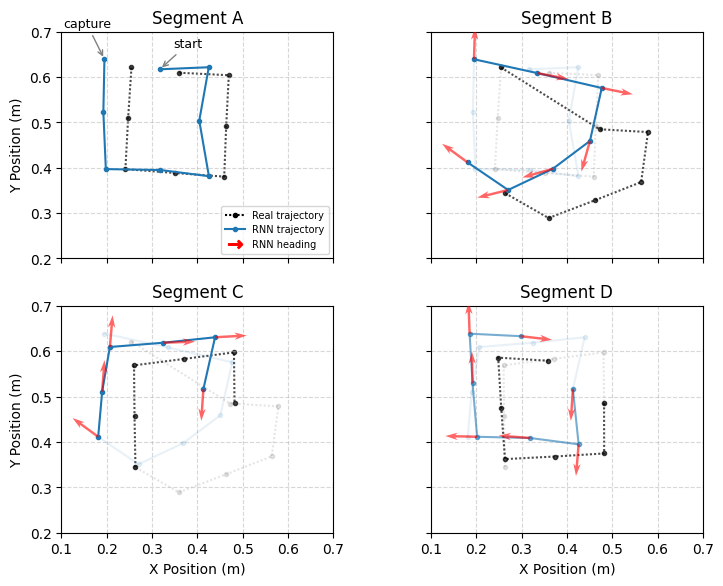

In [17]:
rnn_df = pd.read_csv('rnn_capture_trans.csv', index_col = [0]).loc[25:65].reset_index(drop = True)
ekf_df = pd.read_csv('ekf_capture_trans.csv', index_col = [0]).loc[5:45].reset_index(drop = True)

xlim = (0.1, 0.7)
ylim = (0.2, 0.7)
arrow_length = 0.07

fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=True)

# Extract segments
rnn_seg_1 = rnn_df.iloc[13:21]
rnn_seg_2 = rnn_df.iloc[20:27]
rnn_seg_3 = rnn_df.iloc[26:32]
rnn_seg_4 = rnn_df.iloc[31:38]

def plot_with_arrows(ax, seg, rnn_alpha=1.0, real_alpha=1.0, color='r', label=None, plot_arrows=False):
    ax.plot(seg['real_x'], seg['real_y'], marker='.', c='k', alpha=real_alpha,
            linestyle=linestyles['real'], zorder=1)

    ax.plot(seg['rnn_x'], seg['rnn_y'], marker='.', c=color_scheme['rnn'], alpha=rnn_alpha,
            linestyle=linestyles['rnn'], zorder=2)

    if plot_arrows:
        theta = np.deg2rad(seg['rnn_heading'])
        dx = arrow_length * np.sin(theta)
        dy = arrow_length * np.cos(theta)
        ax.quiver(
            seg['rnn_x'], seg['rnn_y'], dx, dy,
            angles='xy', scale_units='xy', scale=1,
            color=color, width=0.009, headwidth=3, headlength=5, headaxislength=4,
            zorder=5, alpha=0.6
        )

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_aspect('equal')
    ax.grid(True, linestyle='--', alpha=0.5)

# Plot segments
plot_with_arrows(axes[0, 0], rnn_seg_1, real_alpha=0.7)
axes[0, 0].set_title("Segment A")
# Annotate start and capture
start_x, start_y = rnn_seg_1['rnn_x'].iloc[0], rnn_seg_1['rnn_y'].iloc[0]
end_x, end_y = rnn_seg_1['rnn_x'].iloc[-1], rnn_seg_1['rnn_y'].iloc[-1]


axes[0, 0].annotate(
    'start',
    xy=(start_x, start_y),
    xytext=(10, 16),
    textcoords='offset points',
    ha='left',
    fontsize=9,
    arrowprops=dict(arrowstyle='->', color='gray', lw=1)
)

axes[0, 0].annotate(
    'capture',
    xy=(end_x, end_y),
    xytext=(-30, 23),
    textcoords='offset points',
    ha='left',
    fontsize=9,
    arrowprops=dict(arrowstyle='->', color='gray', lw=1)
)



plot_with_arrows(axes[0, 1], rnn_seg_1, rnn_alpha=0.1, real_alpha=0.1, color='r')
plot_with_arrows(axes[0, 1], rnn_seg_2, plot_arrows=True, real_alpha=0.7)
axes[0, 1].set_title("Segment B")

plot_with_arrows(axes[1, 0], rnn_seg_2, rnn_alpha=0.1, real_alpha=0.1, color='r')
plot_with_arrows(axes[1, 0], rnn_seg_3, plot_arrows=True, real_alpha=0.7)
axes[1, 0].set_title("Segment C")

plot_with_arrows(axes[1, 1], rnn_seg_3, rnn_alpha=0.1, real_alpha=0.1, color='r')
plot_with_arrows(axes[1, 1], rnn_seg_4, plot_arrows=True, real_alpha=0.7, rnn_alpha=0.6)
axes[1, 1].set_title("Segment D")

# Tick labels and axis labels
for i in range(2):
    for j in range(2):
        if j != 0:
            axes[i, j].tick_params(labelleft=False)
        else:
            axes[i, j].set_ylabel("Y Position (m)")

        if i != 1:
            axes[i, j].tick_params(labelbottom=False)
        else:
            axes[i, j].set_xlabel("X Position (m)")

plt.tight_layout(pad=1.2)


from matplotlib.lines import Line2D
from matplotlib.patches import FancyArrow

# Custom legend elements
legend_elements = [
    Line2D([0], [0], color='k', linestyle=linestyles['real'], marker='.', label='Real trajectory'),
    Line2D([0], [0], color=color_scheme['rnn'], linestyle=linestyles['rnn'], marker='.', label='RNN trajectory'),
    Line2D([0], [0], color='r', marker=r'$\rightarrow$', linestyle='None', label='RNN heading', markersize=10)
]

axes[0, 0].legend(handles=legend_elements, loc='lower right', fontsize=7, frameon=True)

plt.savefig(FIGURES_DIR / "live_navigation-capture_translate_rnn.png", dpi=300)
plt.show()


In [34]:
((0.112**2 )*2)**0.5

0.15839191898578667

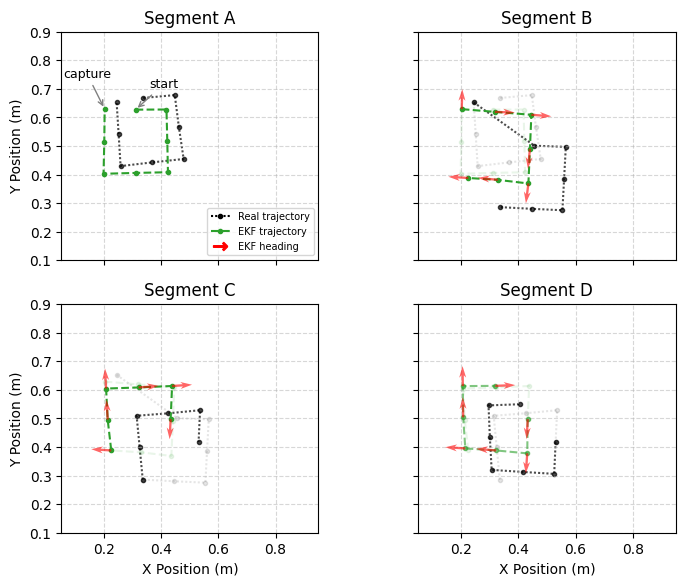

In [18]:
rnn_df = pd.read_csv('rnn_capture_trans.csv', index_col = [0]).loc[25:65].reset_index(drop = True)
ekf_df = pd.read_csv('ekf_capture_trans.csv', index_col = [0]).loc[5:45].reset_index(drop = True)

xlim = (0.05, 0.95)
ylim = (0.1, 0.9)
arrow_length = 0.07

fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=True)

# Extract segments
ekf_seg_1 = ekf_df.iloc[11:19]
ekf_seg_2 = ekf_df.iloc[18:25]
ekf_seg_3 = ekf_df.iloc[24:30]
ekf_seg_4 = ekf_df.iloc[29:36]

def plot_with_arrows(ax, seg, ekf_alpha=1.0, real_alpha=1.0, color='r', label=None, plot_arrows=False):
    ax.plot(seg['real_x'], seg['real_y'], marker='.', c='k', alpha=real_alpha,
            linestyle=linestyles['real'], zorder=1)

    ax.plot(seg['ekf_x'], seg['ekf_y'], marker='.', c=color_scheme['ekf'], alpha=ekf_alpha,
            linestyle=linestyles['ekf'], zorder=2)

    if plot_arrows:
        theta = np.deg2rad(seg['ekf_heading'])
        dx = arrow_length * np.sin(theta)
        dy = arrow_length * np.cos(theta)
        ax.quiver(
            seg['ekf_x'], seg['ekf_y'], dx, dy,
            angles='xy', scale_units='xy', scale=1,
            color=color, width=0.009, headwidth=3, headlength=5, headaxislength=4,
            zorder=5, alpha=0.6
        )

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_aspect('equal')
    ax.grid(True, linestyle='--', alpha=0.5)

# Plot segments
plot_with_arrows(axes[0, 0], ekf_seg_1, real_alpha=0.7)
axes[0, 0].set_title("Segment A")

# Annotate start and capture
start_x, start_y = ekf_seg_1['ekf_x'].iloc[0], ekf_seg_1['ekf_y'].iloc[0]
end_x, end_y = ekf_seg_1['ekf_x'].iloc[-1], ekf_seg_1['ekf_y'].iloc[-1]

axes[0, 0].annotate(
    'start',
    xy=(start_x, start_y),
    xytext=(10, 16),
    textcoords='offset points',
    ha='left',
    fontsize=9,
    arrowprops=dict(arrowstyle='->', color='gray', lw=1)
)

axes[0, 0].annotate(
    'capture',
    xy=(end_x, end_y),
    xytext=(-30, 23),
    textcoords='offset points',
    ha='left',
    fontsize=9,
    arrowprops=dict(arrowstyle='->', color='gray', lw=1)
)

# Other subplots
plot_with_arrows(axes[0, 1], ekf_seg_1, ekf_alpha=0.1, real_alpha=0.1, color='r')
plot_with_arrows(axes[0, 1], ekf_seg_2, plot_arrows=True, real_alpha=0.7)
axes[0, 1].set_title("Segment B")

plot_with_arrows(axes[1, 0], ekf_seg_2, ekf_alpha=0.1, real_alpha=0.1, color='r')
plot_with_arrows(axes[1, 0], ekf_seg_3, plot_arrows=True, real_alpha=0.7)
axes[1, 0].set_title("Segment C")

plot_with_arrows(axes[1, 1], ekf_seg_3, ekf_alpha=0.1, real_alpha=0.1, color='r')
plot_with_arrows(axes[1, 1], ekf_seg_4, plot_arrows=True, real_alpha=0.7, ekf_alpha=0.6)
axes[1, 1].set_title("Segment D")

# Tick labels and axis labels
for i in range(2):
    for j in range(2):
        if j != 0:
            axes[i, j].tick_params(labelleft=False)
        else:
            axes[i, j].set_ylabel("Y Position (m)")

        if i != 1:
            axes[i, j].tick_params(labelbottom=False)
        else:
            axes[i, j].set_xlabel("X Position (m)")

plt.tight_layout(pad=1.2)

# Custom legend for Segment A
legend_elements = [
    Line2D([0], [0], color='k', linestyle=linestyles['real'], marker='.', label='Real trajectory'),
    Line2D([0], [0], color=color_scheme['ekf'], linestyle=linestyles['ekf'], marker='.', label='EKF trajectory'),
    Line2D([0], [0], color='r', marker=r'$\rightarrow$', linestyle='None', label='EKF heading', markersize=10)
]

axes[0, 0].legend(handles=legend_elements, loc='lower right', fontsize=7, frameon=True)

plt.savefig(FIGURES_DIR / "live_navigation-capture_translate_ekf.png", dpi=300)
plt.show()


# Translate and rotate

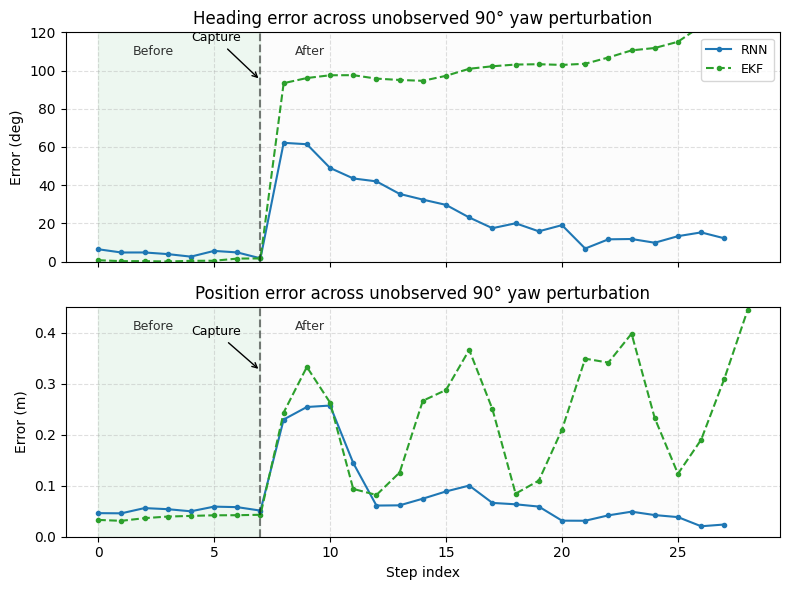

In [19]:
rnn_df = pd.read_csv('rnn_capture_trans_and_rotate.csv', index_col = [0]).loc[27:].reset_index(drop = True)
ekf_df = pd.read_csv('ekf_capture_trans_and_rotate.csv', index_col = [0]).loc[5:].reset_index(drop = True)


fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Compute errors
rnn_ang_errs, rnn_loc_errs = calc_errors(rnn_df, 'rnn')
ekf_ang_errs, ekf_loc_errs = calc_errors(ekf_df, 'ekf')

# Trimmed index range for plotting
idx_range = np.arange(15, 40)
capture_idx = 7  # relative to slice

# --- Top plot: Heading Error ---
axes[0].plot(abs(rnn_ang_errs[12:40].values), marker='.', linestyle=linestyles['rnn'],
             color=color_scheme['rnn'], label='RNN')
axes[0].plot(abs(ekf_ang_errs[11:40].values), marker='.', linestyle=linestyles['ekf'],
             color=color_scheme['ekf'], label='EKF')

axes[0].axvline(capture_idx, color='k', linestyle='--', alpha=0.5)
axes[0].annotate('Capture', xy=(capture_idx, axes[0].get_ylim()[1] * 0.7),
                 xytext=(capture_idx - 3, axes[0].get_ylim()[1] * 0.85),
                 textcoords='data',
                 arrowprops=dict(arrowstyle='->', lw=1, color='k'),
                 fontsize=9)

axes[0].set_ylabel("Error (deg)")
axes[0].set_title("Heading error across unobserved 90° yaw perturbation")
axes[0].legend(loc='upper right', fontsize=9)
axes[0].grid(True, linestyle='--', alpha=0.4)
axes[0].set_ylim(0, 120)

# --- Bottom plot: Location Error ---
axes[1].plot(abs(rnn_loc_errs[12:40]), marker='.', linestyle=linestyles['rnn'],
             color=color_scheme['rnn'])
axes[1].plot(abs(ekf_loc_errs[11:40]), marker='.', linestyle=linestyles['ekf'],
             color=color_scheme['ekf'])

axes[1].axvline(capture_idx, color='k', linestyle='--', alpha=0.5)
axes[1].annotate('Capture', xy=(capture_idx, axes[1].get_ylim()[1] * 0.7),
                 xytext=(capture_idx - 3, axes[1].get_ylim()[1] * 0.85),
                 textcoords='data',
                 arrowprops=dict(arrowstyle='->', lw=1, color='k'),
                 fontsize=9)

axes[1].set_ylabel("Error (m)")
axes[1].set_xlabel("Step index")
axes[1].set_title("Position error across unobserved 90° yaw perturbation")
axes[1].grid(True, linestyle='--', alpha=0.4)
axes[1].set_ylim(0, 0.45)

# Adjust layout
plt.tight_layout()



# Shade pre- and post-rotation regions (light gray)
pre_color = '#d4edda'   # pastel green (Before)
post_color = '#cfd2d4'  # cool gray (After)
for ax in axes:
    ax.axvspan(0, capture_idx, color=pre_color, alpha=0.4, zorder=0, label='_nolegend_')
    ax.axvspan(capture_idx, len(idx_range), color=post_color, alpha=0.05, zorder=0, label='_nolegend_')

# Annotate regions with faint text
for ax in axes:
    y_top = ax.get_ylim()[1]
    ax.text(1.5, y_top * 0.90, 'Before', fontsize=9, color='k', alpha = 0.8)
    ax.text(capture_idx + 1.5, y_top * 0.90, 'After', fontsize=9, color='k', alpha = 0.8)


plt.savefig(FIGURES_DIR / "live_navigation-capture_translate_ang_rotate_errors.png", dpi=300)
plt.show()


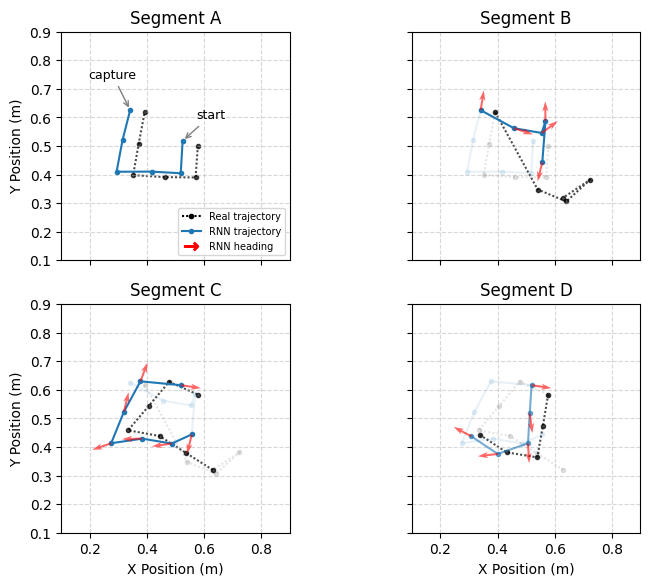

In [20]:
rnn_df = pd.read_csv('rnn_capture_trans_and_rotate.csv', index_col = [0]).loc[27:].reset_index(drop = True)
ekf_df = pd.read_csv('ekf_capture_trans_and_rotate.csv', index_col = [0]).loc[5:].reset_index(drop = True)

xlim = (0.1, 0.9)
ylim = (0.1, 0.9)
arrow_length = 0.07

fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=True)

# Extract segments
rnn_seg_1 = rnn_df.iloc[14:20]
rnn_seg_2 = rnn_df.iloc[19:24]
rnn_seg_3 = rnn_df.iloc[23:30]
rnn_seg_4 = rnn_df.iloc[29:34]

def plot_with_arrows(ax, seg, rnn_alpha=1.0, real_alpha=1.0, color='r', label=None, plot_arrows=False):
    ax.plot(seg['real_x'], seg['real_y'], marker='.', c='k', alpha=real_alpha,
            linestyle=linestyles['real'], zorder=1)

    ax.plot(seg['rnn_x'], seg['rnn_y'], marker='.', c=color_scheme['rnn'], alpha=rnn_alpha,
            linestyle=linestyles['rnn'], zorder=2)

    if plot_arrows:
        theta = np.deg2rad(seg['rnn_heading'])
        dx = arrow_length * np.sin(theta)
        dy = arrow_length * np.cos(theta)
        ax.quiver(
            seg['rnn_x'], seg['rnn_y'], dx, dy,
            angles='xy', scale_units='xy', scale=1,
            color=color, width=0.009, headwidth=3, headlength=5, headaxislength=4,
            zorder=5, alpha=0.6
        )

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_aspect('equal')
    ax.grid(True, linestyle='--', alpha=0.5)

# Plot segments
plot_with_arrows(axes[0, 0], rnn_seg_1, real_alpha=0.7)
axes[0, 0].set_title("Segment A")
# Annotate start and capture
start_x, start_y = rnn_seg_1['rnn_x'].iloc[0], rnn_seg_1['rnn_y'].iloc[0]
end_x, end_y = rnn_seg_1['rnn_x'].iloc[-1], rnn_seg_1['rnn_y'].iloc[-1]


axes[0, 0].annotate(
    'start',
    xy=(start_x, start_y),
    xytext=(10, 16),
    textcoords='offset points',
    ha='left',
    fontsize=9,
    arrowprops=dict(arrowstyle='->', color='gray', lw=1)
)

axes[0, 0].annotate(
    'capture',
    xy=(end_x, end_y),
    xytext=(-30, 23),
    textcoords='offset points',
    ha='left',
    fontsize=9,
    arrowprops=dict(arrowstyle='->', color='gray', lw=1)
)



plot_with_arrows(axes[0, 1], rnn_seg_1, rnn_alpha=0.1, real_alpha=0.1, color='r')
plot_with_arrows(axes[0, 1], rnn_seg_2, plot_arrows=True, real_alpha=0.7)
axes[0, 1].set_title("Segment B")

plot_with_arrows(axes[1, 0], rnn_seg_2, rnn_alpha=0.1, real_alpha=0.1, color='r')
plot_with_arrows(axes[1, 0], rnn_seg_3, plot_arrows=True, real_alpha=0.7)
axes[1, 0].set_title("Segment C")

plot_with_arrows(axes[1, 1], rnn_seg_3, rnn_alpha=0.1, real_alpha=0.1, color='r')
plot_with_arrows(axes[1, 1], rnn_seg_4, plot_arrows=True, real_alpha=0.7, rnn_alpha=0.6)
axes[1, 1].set_title("Segment D")

# Tick labels and axis labels
for i in range(2):
    for j in range(2):
        if j != 0:
            axes[i, j].tick_params(labelleft=False)
        else:
            axes[i, j].set_ylabel("Y Position (m)")

        if i != 1:
            axes[i, j].tick_params(labelbottom=False)
        else:
            axes[i, j].set_xlabel("X Position (m)")

plt.tight_layout(pad=1.2)


from matplotlib.lines import Line2D
from matplotlib.patches import FancyArrow

# Custom legend elements
legend_elements = [
    Line2D([0], [0], color='k', linestyle=linestyles['real'], marker='.', label='Real trajectory'),
    Line2D([0], [0], color=color_scheme['rnn'], linestyle=linestyles['rnn'], marker='.', label='RNN trajectory'),
    Line2D([0], [0], color='r', marker=r'$\rightarrow$', linestyle='None', label='RNN heading', markersize=10)
]

axes[0, 0].legend(handles=legend_elements, loc='lower right', fontsize=7, frameon=True)

plt.savefig(FIGURES_DIR / "live_navigation-capture_translate_and_rotate_rnn.png", dpi=300)
plt.show()


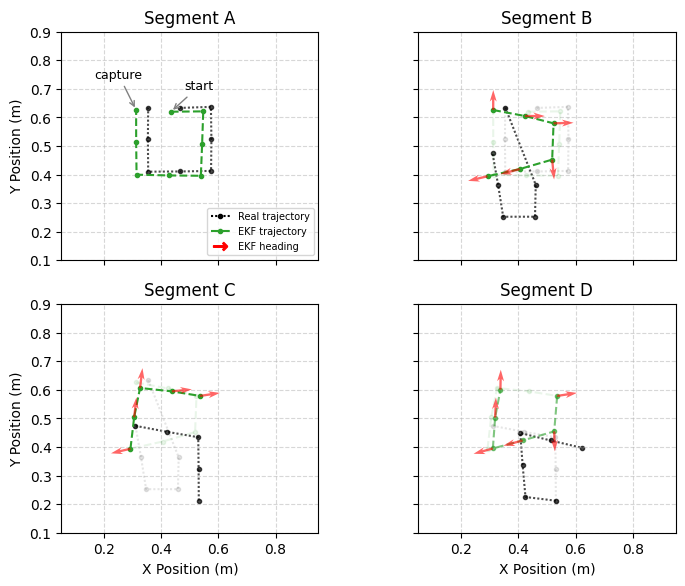

In [21]:
rnn_df = pd.read_csv('rnn_capture_trans_and_rotate.csv', index_col = [0]).loc[27:].reset_index(drop = True)
ekf_df = pd.read_csv('ekf_capture_trans_and_rotate.csv', index_col = [0]).loc[5:].reset_index(drop = True)


xlim = (0.05, 0.95)
ylim = (0.1, 0.9)
arrow_length = 0.07

fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=True)

# Extract segments
ekf_seg_1 = ekf_df.iloc[11:19]
ekf_seg_2 = ekf_df.iloc[18:24]
ekf_seg_3 = ekf_df.iloc[23:28]
ekf_seg_4 = ekf_df.iloc[27:33]

def plot_with_arrows(ax, seg, ekf_alpha=1.0, real_alpha=1.0, color='r', label=None, plot_arrows=False):
    ax.plot(seg['real_x'], seg['real_y'], marker='.', c='k', alpha=real_alpha,
            linestyle=linestyles['real'], zorder=1)

    ax.plot(seg['ekf_x'], seg['ekf_y'], marker='.', c=color_scheme['ekf'], alpha=ekf_alpha,
            linestyle=linestyles['ekf'], zorder=2)

    if plot_arrows:
        theta = np.deg2rad(seg['ekf_heading'])
        dx = arrow_length * np.sin(theta)
        dy = arrow_length * np.cos(theta)
        ax.quiver(
            seg['ekf_x'], seg['ekf_y'], dx, dy,
            angles='xy', scale_units='xy', scale=1,
            color=color, width=0.009, headwidth=3, headlength=5, headaxislength=4,
            zorder=5, alpha=0.6
        )

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_aspect('equal')
    ax.grid(True, linestyle='--', alpha=0.5)

# Plot segments
plot_with_arrows(axes[0, 0], ekf_seg_1, real_alpha=0.7)
axes[0, 0].set_title("Segment A")

# Annotate start and capture
start_x, start_y = ekf_seg_1['ekf_x'].iloc[0], ekf_seg_1['ekf_y'].iloc[0]
end_x, end_y = ekf_seg_1['ekf_x'].iloc[-1], ekf_seg_1['ekf_y'].iloc[-1]

axes[0, 0].annotate(
    'start',
    xy=(start_x, start_y),
    xytext=(10, 16),
    textcoords='offset points',
    ha='left',
    fontsize=9,
    arrowprops=dict(arrowstyle='->', color='gray', lw=1)
)

axes[0, 0].annotate(
    'capture',
    xy=(end_x, end_y),
    xytext=(-30, 23),
    textcoords='offset points',
    ha='left',
    fontsize=9,
    arrowprops=dict(arrowstyle='->', color='gray', lw=1)
)

# Other subplots
plot_with_arrows(axes[0, 1], ekf_seg_1, ekf_alpha=0.1, real_alpha=0.1, color='r')
plot_with_arrows(axes[0, 1], ekf_seg_2, plot_arrows=1, real_alpha=0.7)
axes[0, 1].set_title("Segment B")

plot_with_arrows(axes[1, 0], ekf_seg_2, ekf_alpha=0.1, real_alpha=0.1, color='r')
plot_with_arrows(axes[1, 0], ekf_seg_3, plot_arrows=1, real_alpha=0.7)
axes[1, 0].set_title("Segment C")

plot_with_arrows(axes[1, 1], ekf_seg_3, ekf_alpha=0.1, real_alpha=0.1, color='r')
plot_with_arrows(axes[1, 1], ekf_seg_4, plot_arrows=1, real_alpha=0.7, ekf_alpha=0.6)
axes[1, 1].set_title("Segment D")

# Tick labels and axis labels
for i in range(2):
    for j in range(2):
        if j != 0:
            axes[i, j].tick_params(labelleft=False)
        else:
            axes[i, j].set_ylabel("Y Position (m)")

        if i != 1:
            axes[i, j].tick_params(labelbottom=False)
        else:
            axes[i, j].set_xlabel("X Position (m)")

plt.tight_layout(pad=1.2)

# Custom legend for Segment A
legend_elements = [
    Line2D([0], [0], color='k', linestyle=linestyles['real'], marker='.', label='Real trajectory'),
    Line2D([0], [0], color=color_scheme['ekf'], linestyle=linestyles['ekf'], marker='.', label='EKF trajectory'),
    Line2D([0], [0], color='r', marker=r'$\rightarrow$', linestyle='None', label='EKF heading', markersize=10)
]

axes[0, 0].legend(handles=legend_elements, loc='lower right', fontsize=7, frameon=True)

plt.savefig(FIGURES_DIR / "live_navigation-capture_translate_and_rotate_ekf.png", dpi=300)
plt.show()
